In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df= pd.read_csv(r'C:\Users\rahul\Desktop\MBAN\Data Science\experiment_dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Age         1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Device      1000 non-null   object 
 4   Variant     1000 non-null   object 
 5   Time Spent  1000 non-null   float64
 6   CTR         1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [5]:
df.describe(include='all')

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
count,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000
unique,NaN,NaN,3,3,3,NaN,NaN
top,NaN,NaN,Location2,Device3,Control,NaN,NaN
freq,NaN,NaN,343,346,340,NaN,NaN
mean,499.500000,40.715000,NaN,NaN,NaN,22.713345,0.109145
std,288.819436,13.655557,NaN,NaN,NaN,5.479292,0.022366
min,0.000000,18.000000,NaN,NaN,NaN,7.114806,0.012975
25%,249.750000,28.000000,NaN,NaN,NaN,19.216608,0.094286
50%,499.500000,41.000000,NaN,NaN,NaN,22.506707,0.108944
75%,749.250000,53.000000,NaN,NaN,NaN,26.255950,0.124238


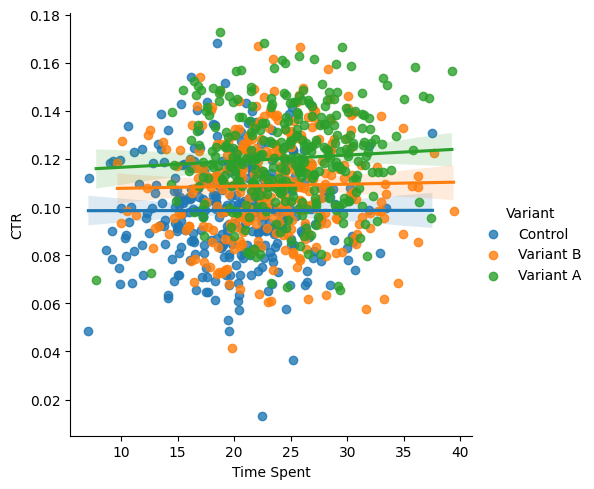

In [6]:
sns.lmplot(data = df, x='Time Spent', y='CTR', hue = 'Variant')

It's difficult to analyze with the graph, so we will analyze based on statistics. 

In [7]:
Variant_Types = df.groupby('Variant')[['Time Spent', 'CTR']].mean()
Variant_Size = df.groupby('Variant').size()
print(Variant_Types)
print(Variant_Size)

           Time Spent       CTR
Variant                        
Control     20.070781  0.098554
Variant A   24.805547  0.120269
Variant B   23.343783  0.108933
Variant
Control      340
Variant A    330
Variant B    330
dtype: int64


It should be noted the CTR for Variant A is the highest. 

Question 1. Analyze the results to determine which feature (if any) results in CTR or Time Spent lift.

In [10]:
control_group = df[df['Variant'] == 'Control']
feature_a = df[df['Variant'] == 'Variant A']
feature_b = df[df['Variant'] == 'Variant B']

ctr_a = feature_a['CTR'].mean() - control_group['CTR'].mean()
time_spent_lift_a = feature_a['Time Spent'].mean() - control_group['Time Spent'].mean()

ctr_b = feature_b['CTR'].mean() - control_group['CTR'].mean()
time_spent_lift_b = feature_b['Time Spent'].mean() - control_group['Time Spent'].mean()
print(control_group['CTR'].mean())
print(f"lift in CTR for feature A: {ctr_a}")
print(f"Average Time Spent for feature A: {time_spent_lift_a}")
print(f"lift in CTR for feature B: {ctr_b}")
print(f"Average Time Spent for feature B: {time_spent_lift_b}")

0.09855415286485454
lift in CTR for feature A: 0.021715340138027603
Average Time Spent for feature A: 4.734766375399197
lift in CTR for feature B: 0.010378887088416652
Average Time Spent for feature B: 3.27300196805772


Analyzing the results to determine which feature results in a lift in Click-Through-Rate (CTR) or Time Spent means comparing the performance of the different features (variants) to the control group:

A greater value of CTR lift indicates that the feature is more effective in engaging users and encouraging them to interact with the feature compared to the control group. A greater value of Time Spent lift indicates that the feature is more engaging or valuable to users compared to the control group.

Based on the initial results, Feature A has comparatively higher values (in both CTR lift and average time spent) than Feature B.

Question 2. Conduct statistical testing to determine if there is a statistically significant difference between the features and the control group.

The null hypothesis would suggest that there is no significant difference between the variations and the control group in terms of the click-through rate (CTR) or average time spent.

Thus, for the given data set, we can consider the below as null-hypothesis:

1. Between the control group and each feature version, the click-through rate did not significantly differ.
2. The average amount of time spent between the control group and each feature variant is not significantly different.

To determine if there is a significant difference between the variants and the control group in terms of the click-through rate (CTR) or average time spent, I will be using statistical tests such as the t-test and calculate the p-value. Other Test such as Pearson's correlation and F-statistic can be useful but we will get the similar result, so I am just perofrming T-Test and finding P-value for my analysis. Below is my reasoning:


T-test:
"The t-test is used to compare the means of two groups." We have the control group and two feature variants (A and B). By conducting a t-test, I can assess if there is a significant difference in CTR and average time spent between each feature variant and the control group. The t-test will provide a t-value that quantifies the difference between the means.

P-value:
"The p-value is a measure of the strength of evidence against the null hypothesis." In this context, it represents the probability of observing the data we have, if there is no real difference between the groups. By calculating the p-value, I can determine if the observed differences in CTR and average time spent are statistically significant or if they could have occurred by chance. If the p-value is below a predetermined significance level (e.g., 0.05), I can reject the null hypothesis and conclude that there is a statistically significant difference between the groups.

In [13]:
import scipy.stats as stats

# t-test for CTR and Average Time Spent between feature A and control group
ctr_a = feature_a['CTR']
time_spent_a = feature_a['Time Spent']

t_statistic_ctr_a, p_value_ctr_a = stats.ttest_ind(ctr_a, control_group['CTR'])
t_statistic_time_spent_a, p_value_time_spent_a = stats.ttest_ind(time_spent_a, control_group['Time Spent'])

# t-test for CTR and Average Time Spent between feature B and control group
ctr_b = feature_b['CTR']
time_spent_b = feature_b['Time Spent']

t_statistic_ctr_b, p_value_ctr_b = stats.ttest_ind(ctr_b, control_group['CTR'])
t_statistic_time_spent_b, p_value_time_spent_b = stats.ttest_ind(time_spent_b, control_group['Time Spent'])

print(f"For CTR - Feature A vs Control: p-value = {p_value_ctr_a}")
print(f"For Average Time Spent - Feature A vs Control: p-value = {p_value_time_spent_a}")

print(f"For CTR - Feature A vs Control: t-statistic = {t_statistic_ctr_a}")
print(f"For Average Time Spent - Feature A vs Control: t-statistic= {t_statistic_time_spent_a}")

print(f"For CTR - Feature B vs Control: p-value = {p_value_ctr_b}")
print(f"For Average Time Spent - Feature B vs Control: p-value = {p_value_time_spent_b}")


print(f"For CTR - Feature B vs Control: t-statistic = {t_statistic_ctr_b}")
print(f"For Average Time Spent - Feature B vs Control: t-statistic= {t_statistic_time_spent_b}")



For CTR - Feature A vs Control: p-value = 1.9602781373243157e-38
For Average Time Spent - Feature A vs Control: p-value = 8.488565644996449e-31
For CTR - Feature A vs Control: t-statistic = 13.829424737499187
For Average Time Spent - Feature A vs Control: t-statistic= 12.142363487472364
For CTR - Feature B vs Control: p-value = 1.8743198199982106e-10
For Average Time Spent - Feature B vs Control: p-value = 1.496358076285182e-15
For CTR - Feature B vs Control: t-statistic = 6.4718143491783255
For Average Time Spent - Feature B vs Control: t-statistic= 8.174237395991806


Question 3. Summarize your results. Make a recommendation to the engineering team about which feature to deploy. 

Based on the statistical result obtained above:

For CTR:

The control group has a CTR of 0.0986.
Variant A has a higher CTR of 0.1203, indicating a lift of 0.0217 compared to the control group.
Variant B has a slightly lower CTR of 0.1089, indicating a lift of 0.0104 compared to the control group.

    For Variant A:
    
        The p-value for Feature A vs Control is approximately 1.96e-38, which is extremely small. This suggests a statistically significant difference in CTR between Feature A and the control group.

        The t-statistic for Feature A vs Control is 13.83, indicating a significant difference between the means of the two groups. This data suggests strong evidence against the null hypothesis.

    For Variant B:
    
        The p-value for Feature B vs Control is approximately 1.87e-10, which is also very small. This indicates a statistically significant difference in CTR between Feature B and the control group.
        
        The t-statistic for Feature B vs Control is 6.471, indicating a significant difference between the means of the two groups. This also provides strong evidence against the null hypothesis.

For Average Time Spent:

The control group has an average time spent of 20.0708 minutes.
Variant A has a higher average time spent of 24.8055 minutes, indicating a lift of 4.7348 minutes compared to the control group.
Variant B has a higher average time spent of 23.3438 minutes, indicating a lift of 3.2730 minutes compared to the control group.

For Variant A:
    
        The p-value for Feature A vs Control is approximately 8.49e-31, which is extremely small. This indicates a statistically significant difference in Average Time Spent between Feature A and the control group.

        The t-statistic for Feature A vs Control is 12.142, indicating a significant difference between the means of the two groups. This also indicates strong evidence against the null hypothesis.

For Variant B:

    The p-value for Feature B vs Control is approximately 1.50e-15, which is also very small. This suggests a statistically significant difference in Average Time Spent between Feature B and the control group.
    
    The t-statistic for Feature B vs Control is 8.174, indicating a significant difference between the means of the two groups. This also provides a strong evidence against the null hypothesis.


Overall, both Variant A and Variant B show improvements in CTR compared to the control group, with Variant A having a higher lift in CTR. In terms of Average Time Spent, both variants show higher values than the control group, with Variant A having a larger lift.

Finally, from the statistical result, obtained p-value and t-stats data indicates a significant difference, and provides strong evidence against the null hypothesis

Based on these results, it can be concluded that Variant A performs better in terms of CTR and Average Time Spent compared to the control group and Variant B. Therefore, it is recommended to deploy Variant A to the audience.


Question 4. Create a roll-out plan. How quickly will you introduce the feature to your audience?

The timeline for implementing the roll-out plan will vary based on factors such as the feature's complexity, the user base size, and the available resources. Considering that, I would deploy the new changes in phases, so that I can consider several other factors such as its potential impact on the user experience, and the stability and reliability of the implementation. I would deploy it in the following phases:   

Phase 1: Beta Release - Start by conducting a Beta release of the feature to a small set of users, such as a specific geographic region or a targeted user segment. This allows for initial testing and gathering feedback from a controlled group.

Phase 2: Steady Expansion - Steadily expand the release to a larger user base while closely monitoring the performance and stability of the feature. This step helps identify any potential issues that might arise with increased usage.

Phase 3: Iterative Improvement - Continuously gather user feedback and monitor key metrics related to the feature's performance, user engagement, and satisfaction. Based on the feedback and data, iterate and make necessary improvements to enhance the feature's effectiveness.

Phase 4: Final Roll-out - Once the feature has been thoroughly tested, refined, and proven to deliver the desired outcomes, proceed with a full roll-out to the entire user base. This step ensures that all users can benefit from the feature's enhancements.